In [1]:
!git clone https://github.com/lanl/OpenFWI
%cd /kaggle/working/OpenFWI

Cloning into 'OpenFWI'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 107 (delta 64), reused 69 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (107/107), 44.38 KiB | 2.96 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/kaggle/working/OpenFWI


チャットGPTで紹介したチューとリアルだと動かないところがあったので修正した。


# ステップ１：データの読み込みと可視化
まず、コンペのデータが配置されているディレクトリを確認し、波形データと速度マップの例を読み込んでみます。

In [2]:
# データディレクトリの内容を表示
import os
base_dir = "/kaggle/input"  # Kaggle環境における入力データのベースパス
print(os.listdir(base_dir))


['waveform-inversion']


In [3]:
# コンペデータフォルダ内のファイル・ディレクトリ構成を確認
data_dir = os.path.join(base_dir, "waveform-inversion")
for item in os.listdir(data_dir):
    print(item)


sample_submission.csv
train_samples
test


In [4]:
# FlatVel_A データセット内のファイルを確認
flatvel_dir = os.path.join(data_dir, "train_samples/FlatVel_A")
print(os.listdir(flatvel_dir))


['model', 'data']


例えば、FlatVel_Aフォルダにはdataとmodelがあり、data{i}.npyが地震波形データ、model{i}.npyが対応する速度マップ(モデル）です。各.npyには500件分のデータがバッチ形式で含まれています。

# データの確認

In [5]:
import numpy as np

# 例として data1.npy と model1.npy を読み込む
seismic_data = np.load(os.path.join(flatvel_dir, "data/data1.npy"))
velocity_maps = np.load(os.path.join(flatvel_dir, "model/model1.npy"))

print("地震波形データの配列サイズ:", seismic_data.shape)
print("速度マップデータの配列サイズ:", velocity_maps.shape)

# 最初のサンプルを取り出し、それぞれの具体的な形状を確認
sample_waveform = seismic_data[0]   # 0番目の波形サンプル
sample_velocity = velocity_maps[0]  # 0番目の速度マップサンプル
print("単一サンプル - 波形:", sample_waveform.shape)
print("単一サンプル - 速度マップ:", sample_velocity.shape)


地震波形データの配列サイズ: (500, 5, 1000, 70)
速度マップデータの配列サイズ: (500, 1, 70, 70)
単一サンプル - 波形: (5, 1000, 70)
単一サンプル - 速度マップ: (1, 70, 70)


# データ構造について説明
<br>https://medium.com/better-programming/seismic-data-to-subsurface-models-with-openfwi-bcca0218b4e8<br>
によると、地震波形データはサイズ$(5,1000,70)でこれは5つの震源による記録波形と1000ステップの時間長と70箇所の地表のセンサーということを意味します。<br>
一方速度マップはサイズ&(1, 70, 70)で、深さ70×横方向70の2Dグリッドに音波速度が入った画像です。<br>
次は速度マップを可視化してみます。


# データの可視化

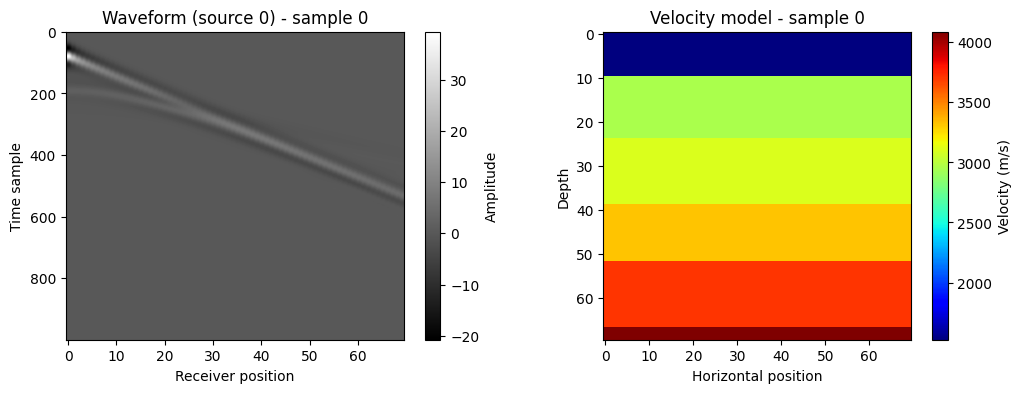

In [6]:
import matplotlib.pyplot as plt

# 可視化するサンプルを指定
i = 0  # 0番目のサンプル
wave_channel0 = seismic_data[i, 0]    # チャネル0 (震源0) の波形データ: shape (1000, 70)
vel_map = velocity_maps[i, 0]         # 速度マップ: shape (70, 70)

# 図を描画
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Waveform (source 0) - sample {}".format(i))
plt.imshow(wave_channel0, cmap="gray", aspect='auto')
plt.colorbar(label="Amplitude")
plt.xlabel("Receiver position"), plt.ylabel("Time sample")

plt.subplot(1,2,2)
plt.title("Velocity model - sample {}".format(i))
plt.imshow(vel_map, cmap="jet")
plt.colorbar(label="Velocity (m/s)")
plt.xlabel("Horizontal position"), plt.ylabel("Depth")
plt.show()


# 波形データグラフと速度マップの説明
上記のコードは、左側に波形データ、右側に対応する速度マップを描画しています。波形データは縦軸が時間、横軸が受信機位置で、灰色の濃淡が振幅を表す画像になっています。地震記録のショットギャザーを可視化したものです）。速度マップは地下の速度構造で、色は速度値（カラーマップ "jet" を使用）を表します。FlatVel-Aの例では、層状に色が分かれており、上部から下部にかけて速度が変化する水平層構造になっていることが分かります。<br>



# ５か所での地震波形データの可視化（kaggle参照)
波形データ(500, **5**, 1000, 70)で5か所それぞれを可視化

Seismic data size: (500, 5, 1000, 70)


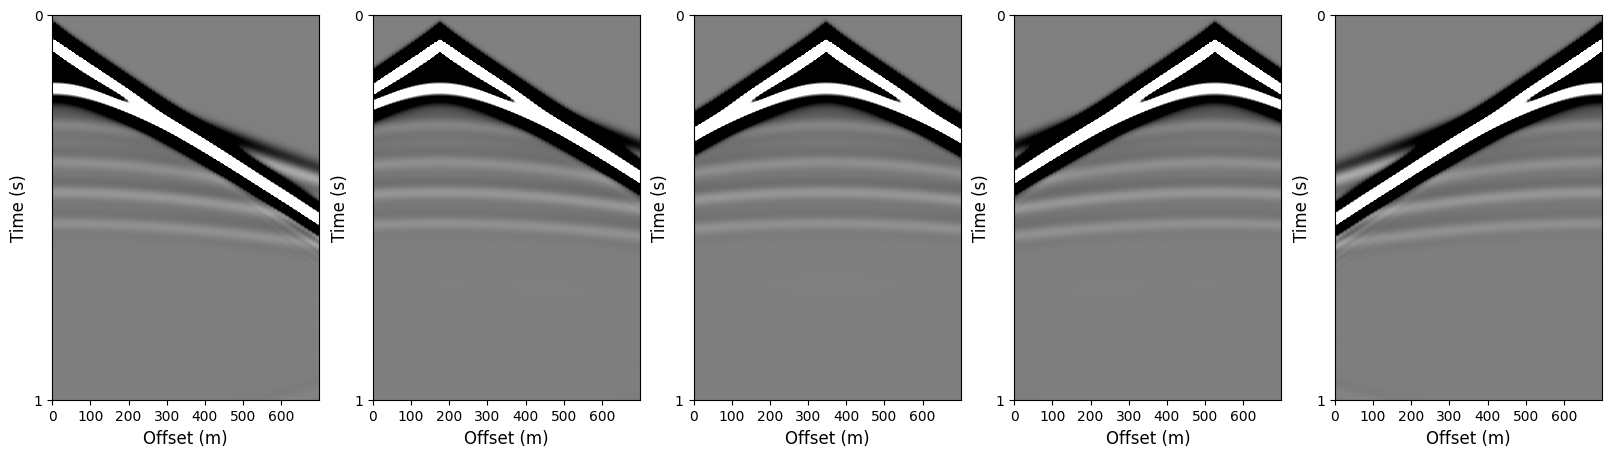

In [7]:
data = seismic_data
sample=i
print('Seismic data size:', data.shape)

fig,ax=plt.subplots(1,5,figsize=(20,5))
ax[0].imshow(data[sample,0,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[1].imshow(data[sample,1,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[2].imshow(data[sample,2,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[3].imshow(data[sample,3,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[4].imshow(data[sample,4,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
for axis in ax:
   axis.set_xticks(range(0, 70, 10))
   axis.set_xticklabels(range(0, 700, 100))
   axis.set_yticks(range(0, 2000, 1000))
   axis.set_yticklabels(range(0, 2,1))
   axis.set_ylabel('Time (s)', fontsize=12)
   axis.set_xlabel('Offset (m)', fontsize=12)
plt.show()

# InversionNet による学習と評価

このデータを学習用（訓練）と検証用（バリデーション）に分ける準備をします。OpenFWIでは推奨の分割が決まっており、FlatVel-Aの場合は最初の24,000サンプルを訓練、次の6,000サンプルをテストとしています
github.com
（実際にはmodel1.npy～model48.npyが訓練、model49.npy～model60.npyがテストという形です）。本Notebookでは、簡略のため一部データのみを使い、学習と検証を行います。
# ステップ１学習、検証データの作成
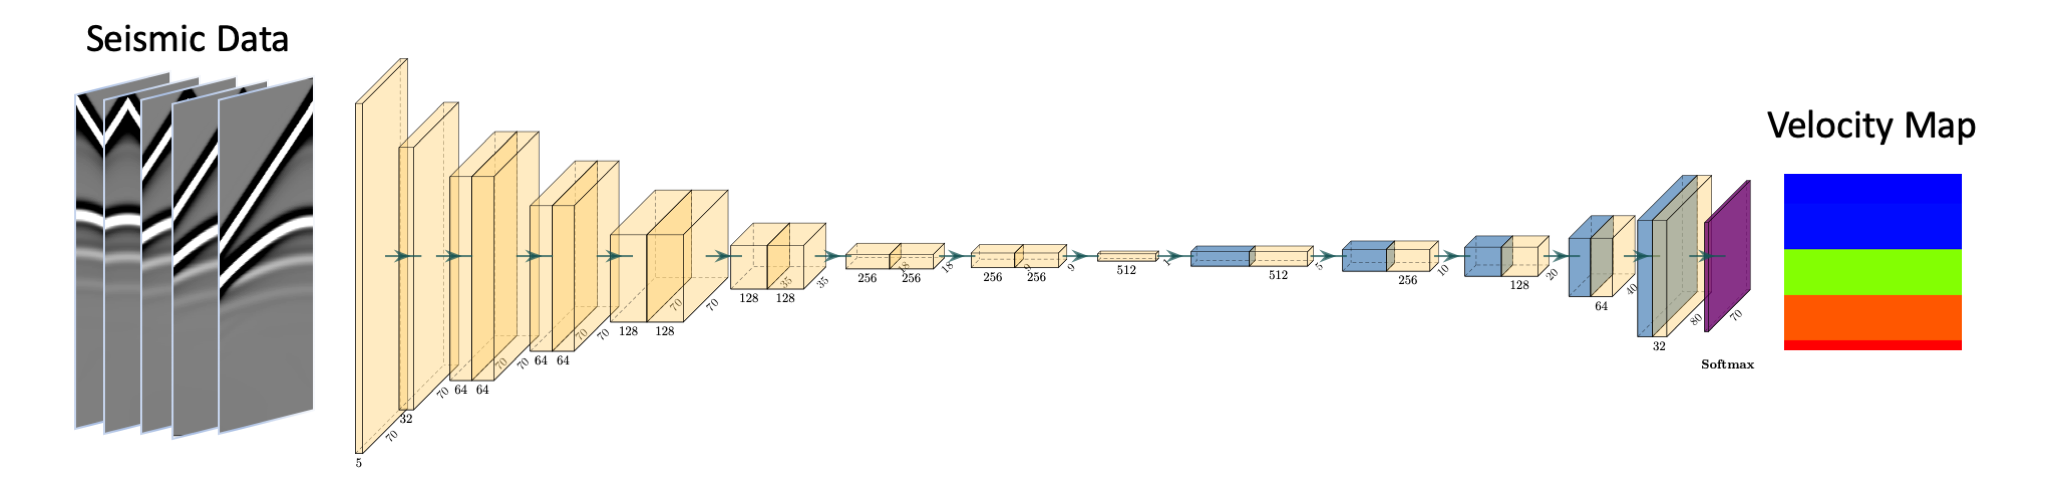
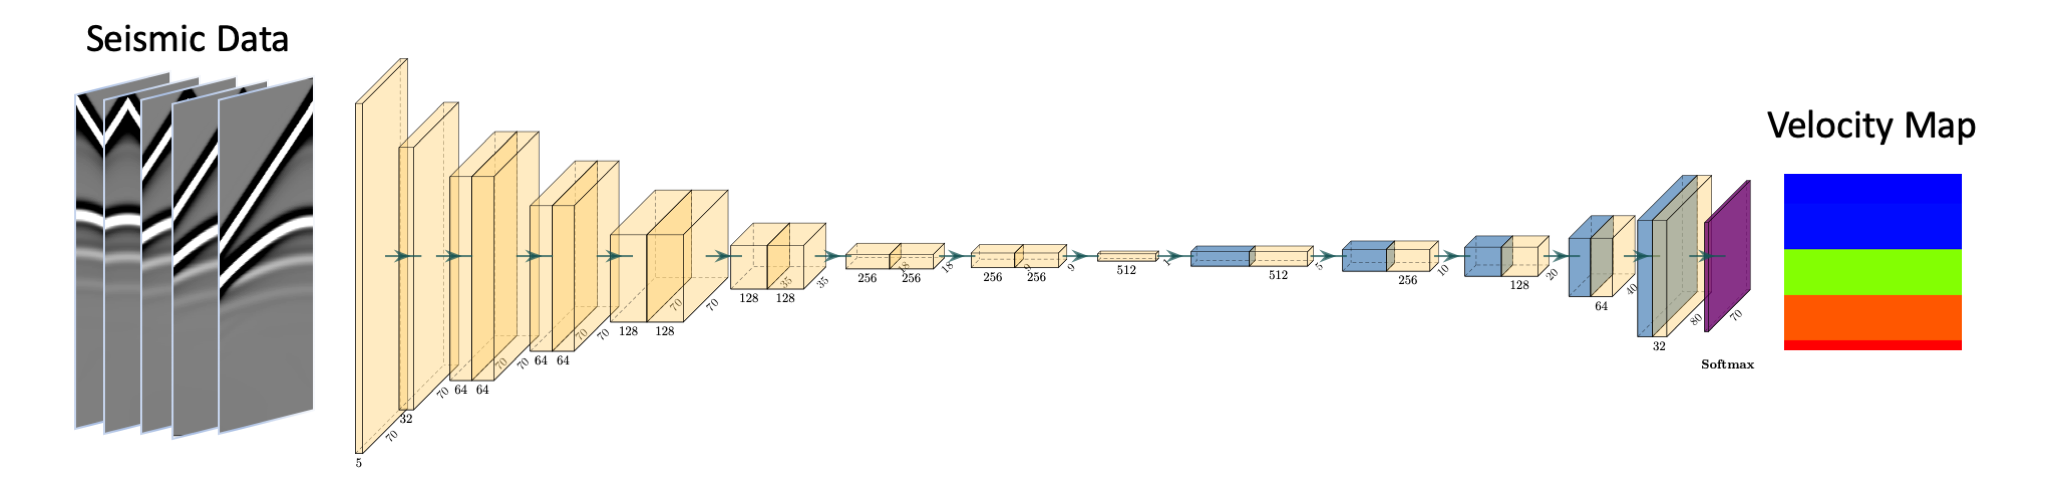

In [8]:
# データ分割の準備（例として data1.npy の中をさらに訓練・検証に分ける）
all_waveforms = seismic_data    # data1.npy 内の500サンプルを取得
all_velmaps = velocity_maps

# 400サンプルを学習に、100サンプルを検証に使う
train_wave = all_waveforms[:400]
train_vel = all_velmaps[:400]
val_wave = all_waveforms[400:]
val_vel = all_velmaps[400:]

print("学習用データサイズ:", train_wave.shape, train_vel.shape)
print("検証用データサイズ:", val_wave.shape, val_vel.shape)


学習用データサイズ: (400, 5, 1000, 70) (400, 1, 70, 70)
検証用データサイズ: (100, 5, 1000, 70) (100, 1, 70, 70)


ここでは例としてdata1.npyの中の500件を400:100に分けました。本来は複数ファイルにまたがる大きなデータセットですが、チュートリアルの目的上、この一部でモデルの学習デモを行います。
# ステップ２モデル構築の実装
モデル構造<br>

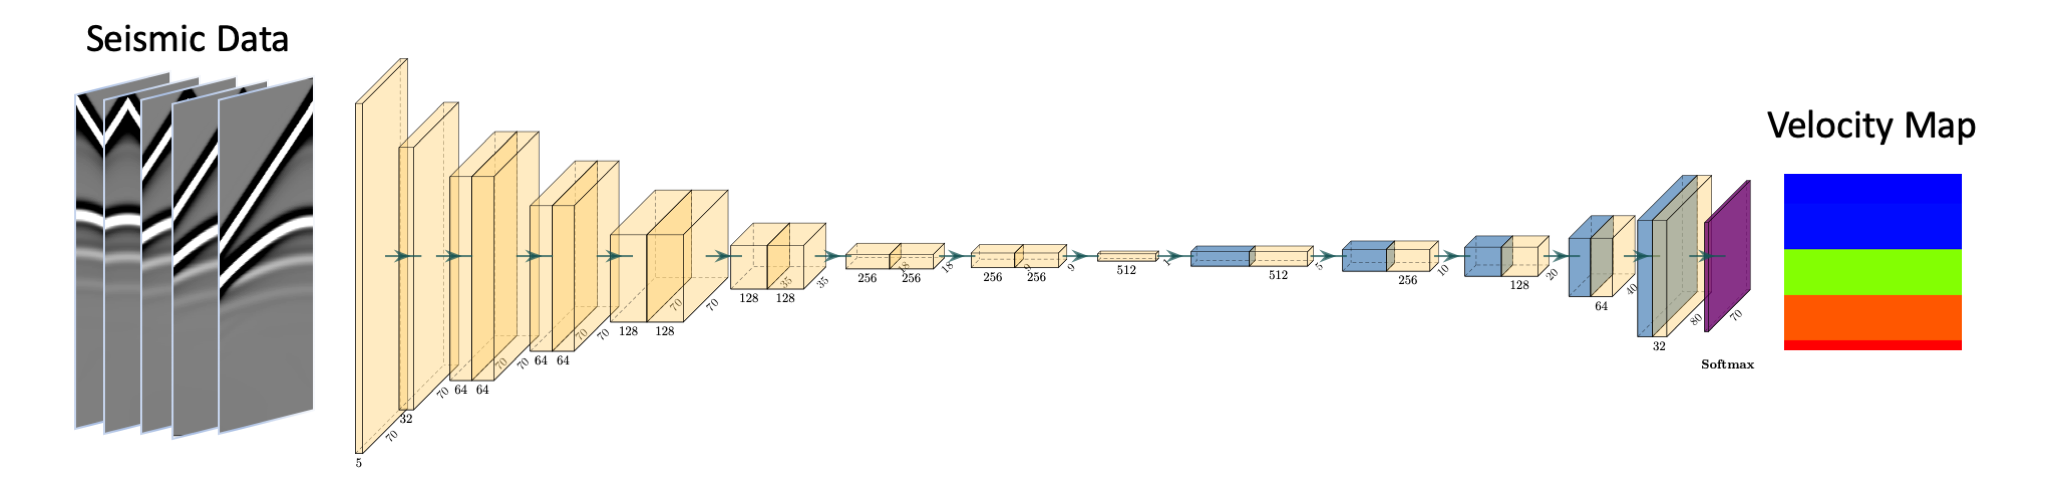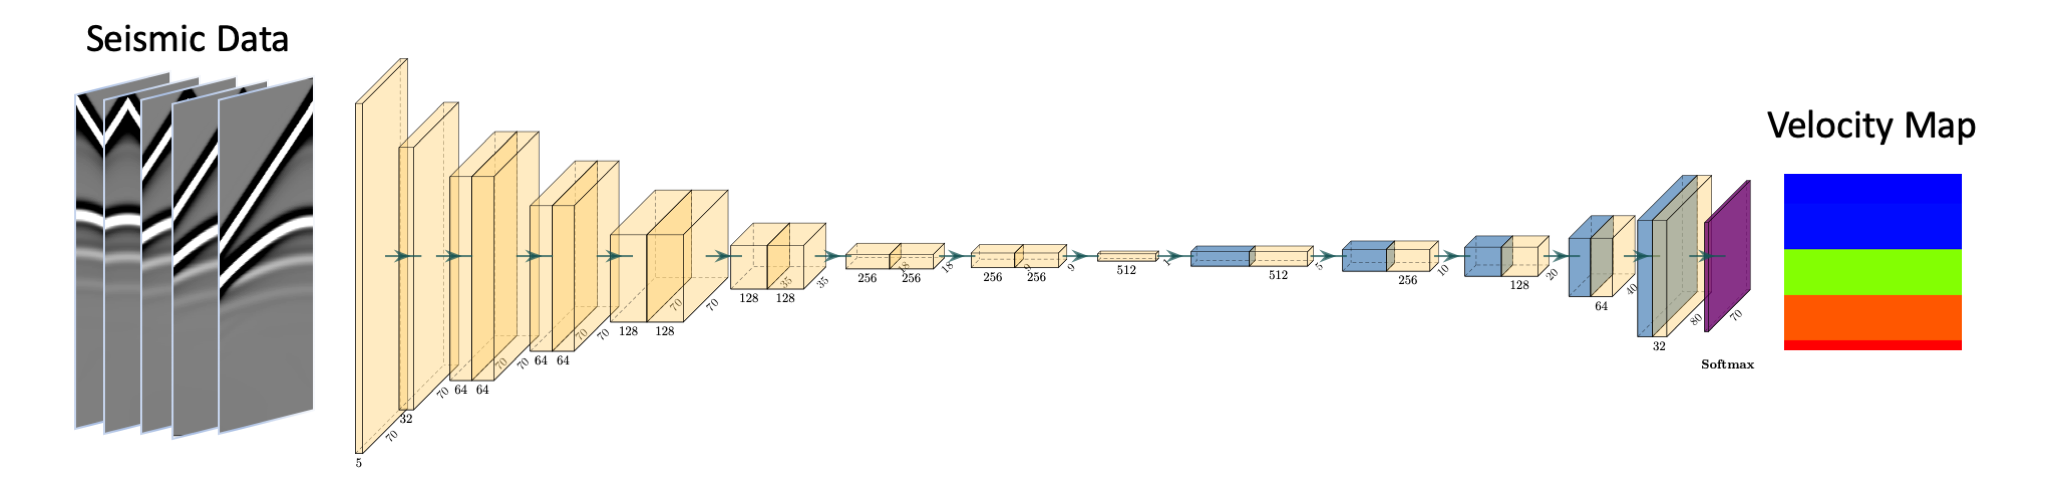 <br>

それでは、InversionNetモデルを実装していきます。InversionNetはU-Netに似たエンコーダ・デコーダ構造のCNNで、入力$(5,1000,70)$の波形画像から出力$(1,70,70)$の速度マップを予測します
arxiv.org
。原論文の実装では畳み込みや転置畳み込みを何層も重ねていますが、ここではシンプルな一例として実装します（概念理解のため、一部層数を減らしています）。

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InversionNet70x70(nn.Module):
    def __init__(self):
        super(InversionNet70x70, self).__init__()
        # エンコーダ部
        self.enc1 = nn.Conv2d(5, 32, kernel_size=3, padding=1)   # (1000,70) → (1000,70)
        self.pool1 = nn.MaxPool2d((2, 2))                        # → (500,35)
        
        self.enc2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # → (500,35)
        self.pool2 = nn.MaxPool2d((2, 1))                        # → (250,35)

        self.enc3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # → (250,35)
        self.pool3 = nn.MaxPool2d((2, 1))                        # → (125,35)

        # デコーダ部
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=(2,1), stride=(2,1)) # → (250,35)
        self.up2 = nn.ConvTranspose2d(64, 32, kernel_size=(2,1), stride=(2,1))  # → (500,35)
        self.up3 = nn.ConvTranspose2d(32, 16, kernel_size=(2,2), stride=(2,2))  # → (1000,70)

        # 最終整形層：1000→70へ縮小（時間方向を圧縮）
        self.final = nn.Conv2d(16, 1, kernel_size=(15,1), stride=(15,1))        # → (66,70)

    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = self.pool1(x)

        x = F.relu(self.enc2(x))
        x = self.pool2(x)

        x = F.relu(self.enc3(x))
        x = self.pool3(x)

        x = F.relu(self.up1(x))
        x = F.relu(self.up2(x))
        x = F.relu(self.up3(x))

        x = self.final(x)  # shape: [B, 1, 66, 70]
        x = F.interpolate(x, size=(70, 70), mode='bilinear', align_corners=False)
        return x


#モデルのインスタンス化
model = InversionNet70x70()
dummy_input = torch.randn(1, 5, 1000, 70)
dummy_output = model(dummy_input)
print("出力テンソルサイズ：", dummy_output.shape)

出力テンソルサイズ： torch.Size([1, 1, 70, 70])


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InversionNet70x70(nn.Module):
    def __init__(self):
        super().__init__()
        # エンコーダ：時間軸を1000 → 70に縮小（段階的に圧縮）
        self.encoder = nn.Sequential(
            nn.Conv2d(5, 32, kernel_size=3, padding=1),   # (1000,70)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)),              # (500,35)
            

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,1)),              # (250,35)
            

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,1)),              # (125,35)
            

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,1)),              # (62,35)
            nn.Upsample(size=(70,70), mode='bilinear', align_corners=False)  #時間方向の圧縮

            
        )

        # デコーダ（チャネル縮小して速度マップを出力）
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=1)  # 出力チャネル = 1（速度マップ）
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
#モデルのインスタンス化
model = InversionNet70x70()
dummy_input = torch.randn(1, 5, 1000, 70)
dummy_output = model(dummy_input)
print("出力テンソルサイズ：", dummy_output.shape)

出力テンソルサイズ： torch.Size([1, 1, 70, 70])


In [11]:
import torch.optim as optim

# デバイスの設定（GPUが使える環境ならGPUを使用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# データをTorchテンソルに変換しデバイスへ
train_wave_t = torch.tensor(train_wave, dtype=torch.float32).to(device)
train_vel_t = torch.tensor(train_vel, dtype=torch.float32).to(device)
val_wave_t = torch.tensor(val_wave, dtype=torch.float32).to(device)
val_vel_t = torch.tensor(val_vel, dtype=torch.float32).to(device)

# 訓練ループ（エポック数を2に設定）
num_epochs = 2
batch_size = 32
for epoch in range(1, num_epochs+1):
    model.train()
    running_loss = 0.0
    # ミニバッチ学習
    for i in range(0, train_wave_t.size(0), batch_size):
        inputs = train_wave_t[i:i+batch_size]
        targets = train_vel_t[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / train_wave_t.size(0)
    # 検証データでの損失
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_wave_t)
        val_loss = criterion(val_outputs, val_vel_t).item()
    print(f"Epoch {epoch}: train_loss = {epoch_loss:.4f}, val_loss = {val_loss:.4f}")


Epoch 1: train_loss = 8124832.5600, val_loss = 8675523.0000
Epoch 2: train_loss = 8120424.5600, val_loss = 8658414.0000


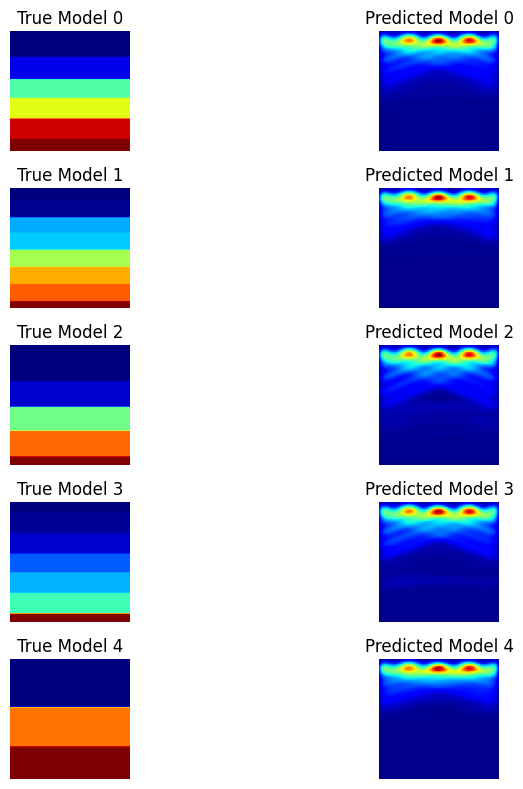

In [12]:
model.eval()
with torch.no_grad():
    # 検証データから最初の5サンプルを予測
    pred_vel_maps = model(val_wave_t[:5])
# pred_vel_maps は Tensor型なので、プロットのためCPUに戻してNumpy配列化
pred_vel_maps = pred_vel_maps.cpu().numpy()
true_vel_maps = val_vel[:5, 0]  # 元のnumpyデータから真の速度マップ（次元を合わせて [5, 70, 70]）
pred_vel_maps = pred_vel_maps[:, 0]  # [5, 70, 70]

# 予測結果と真の速度マップを並べて表示
plt.figure(figsize=(10, 8))
for idx in range(5):
    plt.subplot(5, 2, 2*idx+1)
    plt.imshow(true_vel_maps[idx], cmap="jet")
    plt.title(f"True Model {idx}")
    plt.axis('off')
    plt.subplot(5, 2, 2*idx+2)
    plt.imshow(pred_vel_maps[idx], cmap="jet")
    plt.title(f"Predicted Model {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()
